In [1]:
# Name : N.SURYA TEJESWAR REDDY   ,   ROLLNO : CSE23127  ,  Course Title : Data Visualization  , Course Code : 23CSE353 

In [2]:
#  CASE STUDY - 2
# TOPIC :  VISUALISING POPULARITY AND QUALITY IN MOBILE GAMING APPS

In [3]:
# DATA SETS :
#    googleplaystore_games.csv
#    android-games.csv

In [4]:
# Question - 1 : How do ratings differ across groups?

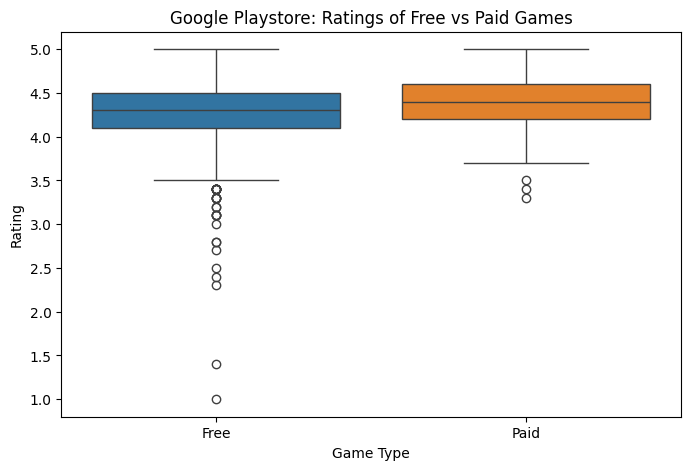

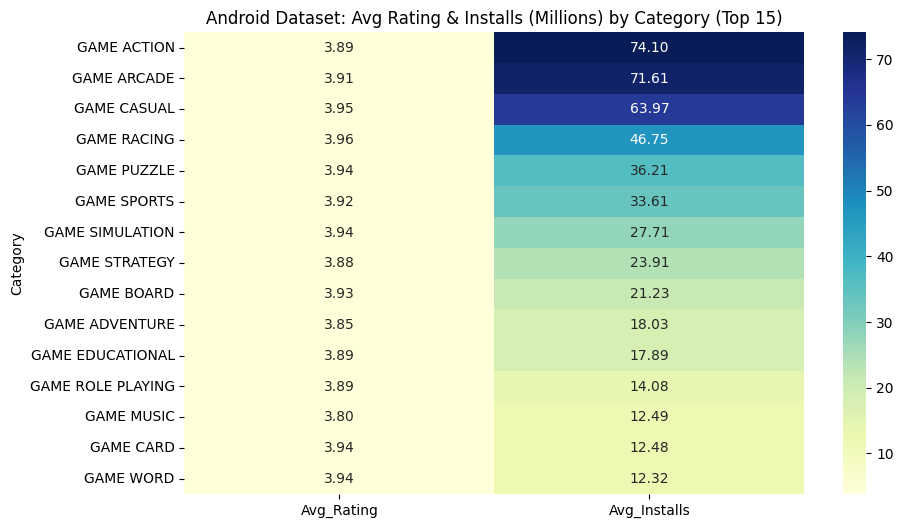

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Load datasets
# ==============================
google = pd.read_csv("googleplaystore_games.csv")
android = pd.read_csv("android-games.csv")

# ==============================
# GOOGLE PLAYSTORE → Boxplot by Free vs Paid
# ==============================
# Clean Rating
google['Rating'] = pd.to_numeric(google['Rating'], errors='coerce')

# Drop rows with missing values in Type/Rating
google_type = google.dropna(subset=['Type', 'Rating'])

# Boxplot with custom colors
plt.figure(figsize=(8,5))
sns.boxplot(
    data=google_type,
    x="Type",
    y="Rating",
    hue="Type",            
    palette={"Free": "#1f77b4", "Paid": "#ff7f0e"},
    legend=False           
)

plt.title("Google Playstore: Ratings of Free vs Paid Games")
plt.ylabel("Rating")
plt.xlabel("Game Type")
plt.show()

# ==============================
# ANDROID DATASET → Heatmap by Category
# ==============================

# Clean column names
android.columns = android.columns.str.strip()

# Function to convert installs (handles M = million, k = thousand)
def convert_installs(x):
    if isinstance(x, str):
        x = x.strip()
        if x.endswith("M"):
            return float(x.replace("M", "").strip()) * 1_000_000
        elif x.endswith("k") or x.endswith("K"):
            return float(x.replace("k", "").replace("K", "").strip()) * 1_000
        else:
            try:
                return float(x)
            except:
                return None
    return x

# Apply cleaning
android["installs"] = android["installs"].apply(convert_installs)
android["average rating"] = pd.to_numeric(android["average rating"], errors="coerce")

# Group by category → Avg Rating + Avg Installs
android_summary = android.groupby("category").agg(
    Avg_Rating=('average rating','mean'),
    Avg_Installs=('installs','mean')
).reset_index()

# Convert installs to millions for readability
android_summary['Avg_Installs'] = android_summary['Avg_Installs'] / 1_000_000

# Pick top 15 categories by installs
top15 = android_summary.sort_values("Avg_Installs", ascending=False).head(15)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    top15.set_index("category")[['Avg_Rating','Avg_Installs']],
    annot=True, cmap="YlGnBu", fmt=".2f"
)
plt.title("Android Dataset: Avg Rating & Installs (Millions) by Category (Top 15)")
plt.ylabel("Category")
plt.show()


In [6]:
# Question - 2: How do user ratings distribute overall?

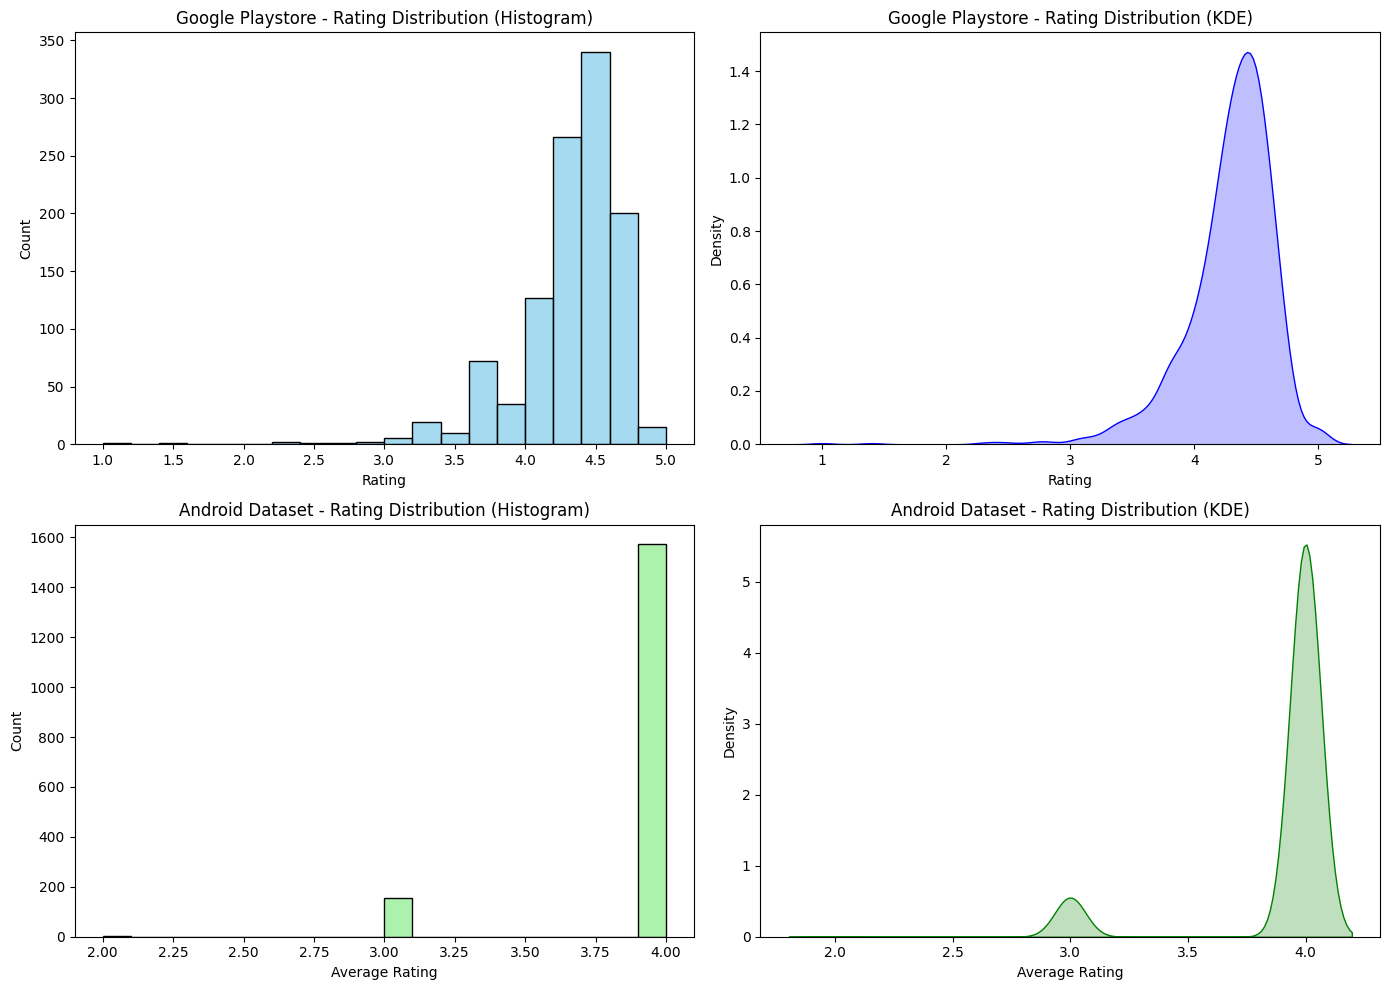

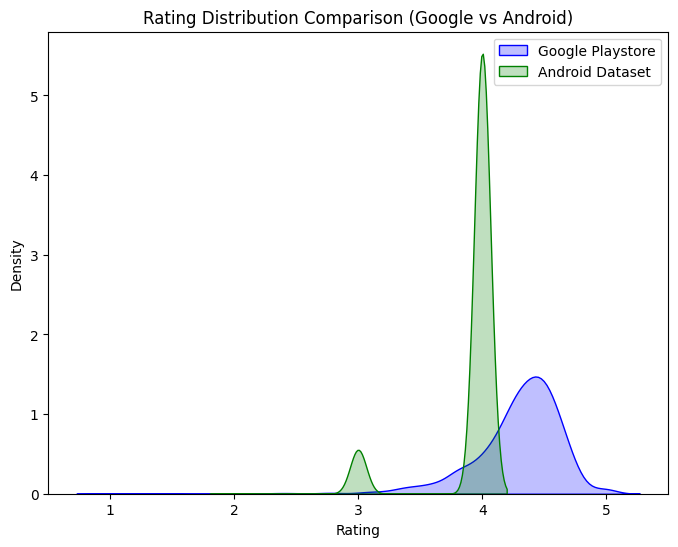

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Load datasets
# ==============================
google = pd.read_csv("googleplaystore_games.csv")
android = pd.read_csv("android-games.csv")

# ==============================
# GOOGLE PLAYSTORE DATASET
# ==============================
google['Rating'] = pd.to_numeric(google['Rating'], errors='coerce')
google_ratings = google['Rating'].dropna()

# ==============================
# ANDROID DATASET
# ==============================
android['average rating'] = pd.to_numeric(android['average rating'], errors='coerce')
android_ratings = android['average rating'].dropna()

# ==============================
# PLOTTING - 2x2 Subplots
# ==============================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Google Playstore - Histogram
sns.histplot(google_ratings, bins=20, kde=False, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Google Playstore - Rating Distribution (Histogram)")
axes[0, 0].set_xlabel("Rating")
axes[0, 0].set_ylabel("Count")

# Google Playstore - KDE
sns.kdeplot(google_ratings, fill=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title("Google Playstore - Rating Distribution (KDE)")
axes[0, 1].set_xlabel("Rating")
axes[0, 1].set_ylabel("Density")

# Android Dataset - Histogram
sns.histplot(android_ratings, bins=20, kde=False, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title("Android Dataset - Rating Distribution (Histogram)")
axes[1, 0].set_xlabel("Average Rating")
axes[1, 0].set_ylabel("Count")

# Android Dataset - KDE
sns.kdeplot(android_ratings, fill=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title("Android Dataset - Rating Distribution (KDE)")
axes[1, 1].set_xlabel("Average Rating")
axes[1, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# ==============================
# OVERLAY KDE PLOT
# ==============================
plt.figure(figsize=(8, 6))
sns.kdeplot(google_ratings, fill=True, color='blue', label='Google Playstore')
sns.kdeplot(android_ratings, fill=True, color='green', label='Android Dataset')

plt.title("Rating Distribution Comparison (Google vs Android)")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.show()


In [8]:
# Question -3 : Are popular games always well-rated?

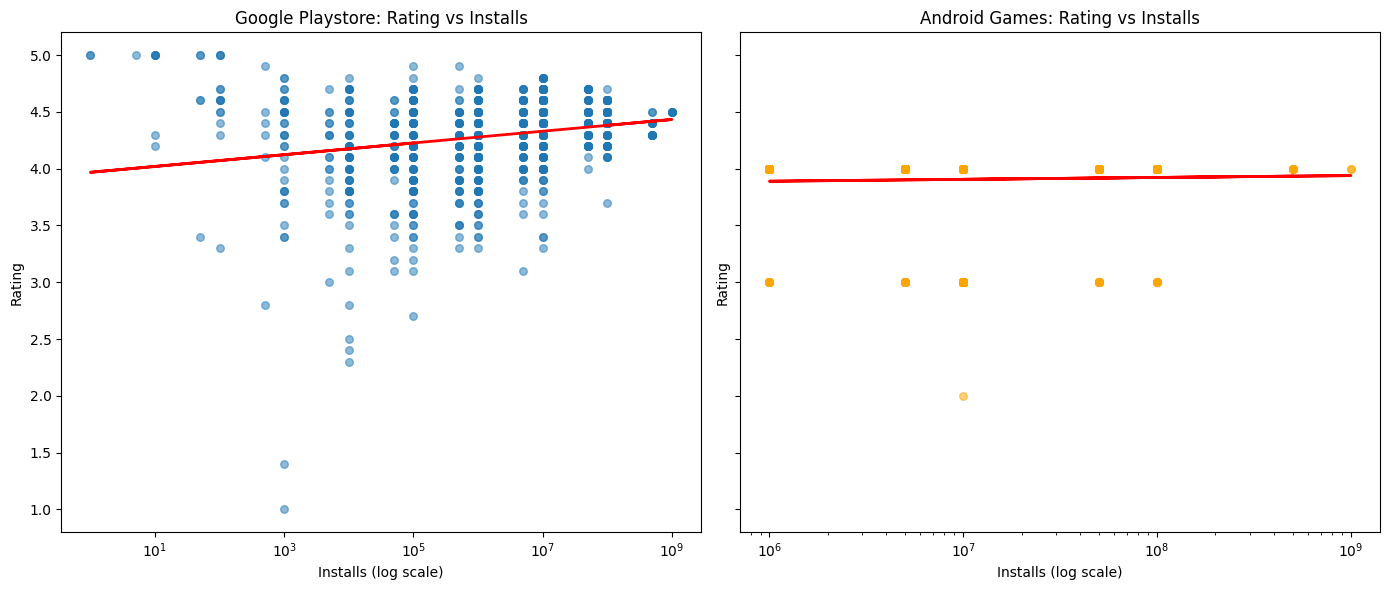

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load datasets ---
google_df = pd.read_csv("googleplaystore_games.csv")
android_df = pd.read_csv("android-games.csv")

# --- Google Play Dataset ---
google_df_clean = google_df.copy()
google_df_clean['Installs'] = google_df_clean['Installs'].str.replace(r'[+,]', '', regex=True).astype(float)
google_scatter = google_df_clean.dropna(subset=['Rating', 'Installs'])

# --- Android Games Dataset ---
def parse_installs(val):
    if isinstance(val, str):
        val = val.strip()
        if 'M' in val:
            return float(val.replace('M', '').replace(' ', '')) * 1e6
        elif 'B' in val:
            return float(val.replace('B', '').replace(' ', '')) * 1e9
        elif 'K' in val:
            return float(val.replace('K', '').replace(' ', '')) * 1e3
        else:
            try:
                return float(val)
            except:
                return None
    return val

android_df_clean = android_df.copy()
android_df_clean['installs_num'] = android_df_clean['installs'].apply(parse_installs)
android_scatter = android_df_clean.dropna(subset=['average rating', 'installs_num'])

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# === Google Playstore Plot ===
x_g = np.log10(google_scatter['Installs'])
y_g = google_scatter['Rating']
axes[0].scatter(google_scatter['Installs'], y_g, alpha=0.5, s=30)
axes[0].set_xscale("log")
# Fit regression line
m, b = np.polyfit(x_g, y_g, 1)
axes[0].plot(google_scatter['Installs'], m * np.log10(google_scatter['Installs']) + b, color="red", linewidth=2)
axes[0].set_title("Google Playstore: Rating vs Installs")
axes[0].set_xlabel("Installs (log scale)")
axes[0].set_ylabel("Rating")

# === Android Games Plot ===
x_a = np.log10(android_scatter['installs_num'])
y_a = android_scatter['average rating']
axes[1].scatter(android_scatter['installs_num'], y_a, alpha=0.5, s=30, color="orange")
axes[1].set_xscale("log")
# Fit regression line
m, b = np.polyfit(x_a, y_a, 1)
axes[1].plot(android_scatter['installs_num'], m * np.log10(android_scatter['installs_num']) + b, color="red", linewidth=2)
axes[1].set_title("Android Games: Rating vs Installs")
axes[1].set_xlabel("Installs (log scale)")
axes[1].set_ylabel("Rating")

plt.tight_layout()
plt.show()


In [10]:
# Question - 4 : Do highly downloaded games always have high ratings? Or is there a tradeoff?

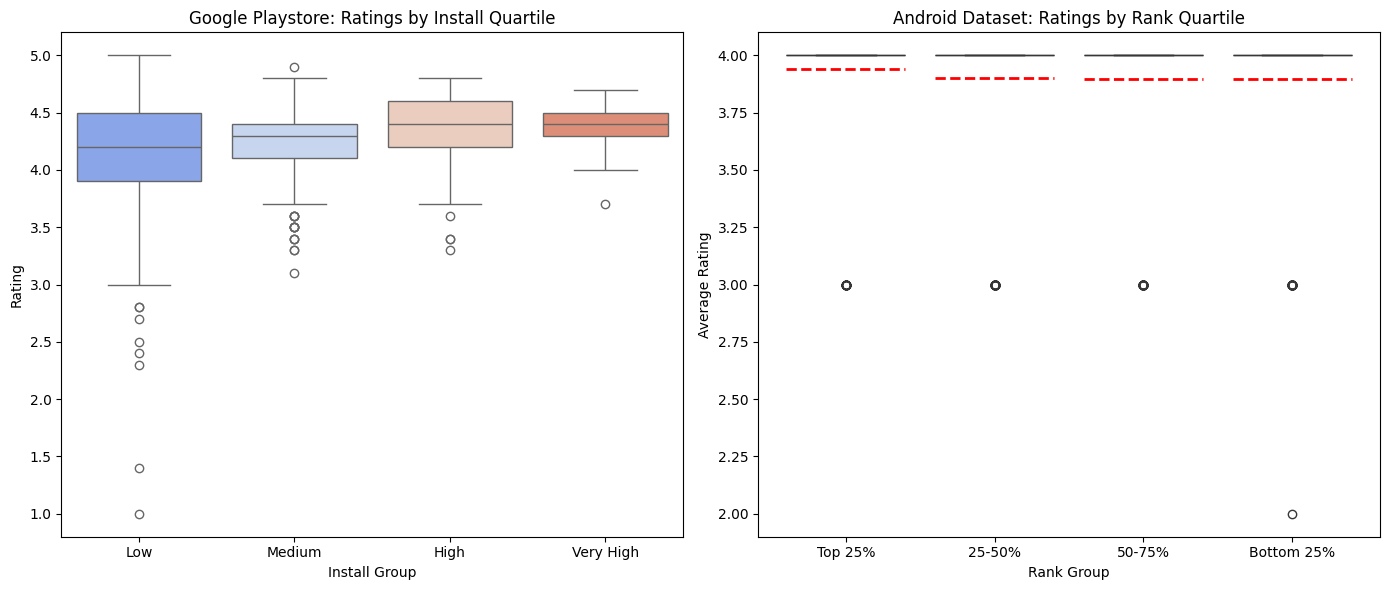

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# Load datasets
# =============================
google = pd.read_csv("googleplaystore_games.csv")
android = pd.read_csv("android-games.csv")

# =============================
# GOOGLE PLAYSTORE DATASET
# =============================
# Clean installs
google['Installs'] = google['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
google['Installs'] = pd.to_numeric(google['Installs'], errors='coerce')

google_clean = google[['Installs', 'Rating']].dropna()
google_clean['Install_Group'] = pd.qcut(
    google_clean['Installs'], 4, labels=['Low', 'Medium', 'High', 'Very High']
)

# =============================
# ANDROID DATASET
# =============================
android['average rating'] = pd.to_numeric(android['average rating'], errors='coerce')
android['rank'] = pd.to_numeric(android['rank'], errors='coerce')

android_clean = android[['rank', 'average rating']].dropna()
android_clean['Rank_Group'] = pd.qcut(
    android_clean['rank'], 4, labels=['Top 25%', '25-50%', '50-75%', 'Bottom 25%']
)

# =============================
# PLOTS
# =============================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Google Playstore boxplot
sns.boxplot(
    data=google_clean,
    x='Install_Group',
    y='Rating',
    hue='Install_Group',    # 👈 required for palette
    palette="coolwarm",
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Google Playstore: Ratings by Install Quartile")
axes[0].set_xlabel("Install Group")
axes[0].set_ylabel("Rating")

# Android dataset boxplot with mean lines
sns.boxplot(
    data=android_clean,
    x='Rank_Group',
    y='average rating',
    hue='Rank_Group',       #  required for palette
    palette="viridis",
    legend=False,
    ax=axes[1]
)

# Add horizontal mean lines
means = android_clean.groupby('Rank_Group', observed=True)['average rating'].mean()
for i, val in enumerate(means):
    axes[1].hlines(val, i - 0.4, i + 0.4, colors='red', linestyles='--', linewidth=2)

axes[1].set_title("Android Dataset: Ratings by Rank Quartile")
axes[1].set_xlabel("Rank Group")
axes[1].set_ylabel("Average Rating")

plt.tight_layout()
plt.show()


In [12]:
# Question - 5 : Are high-rated games more resilient to low star ratings?

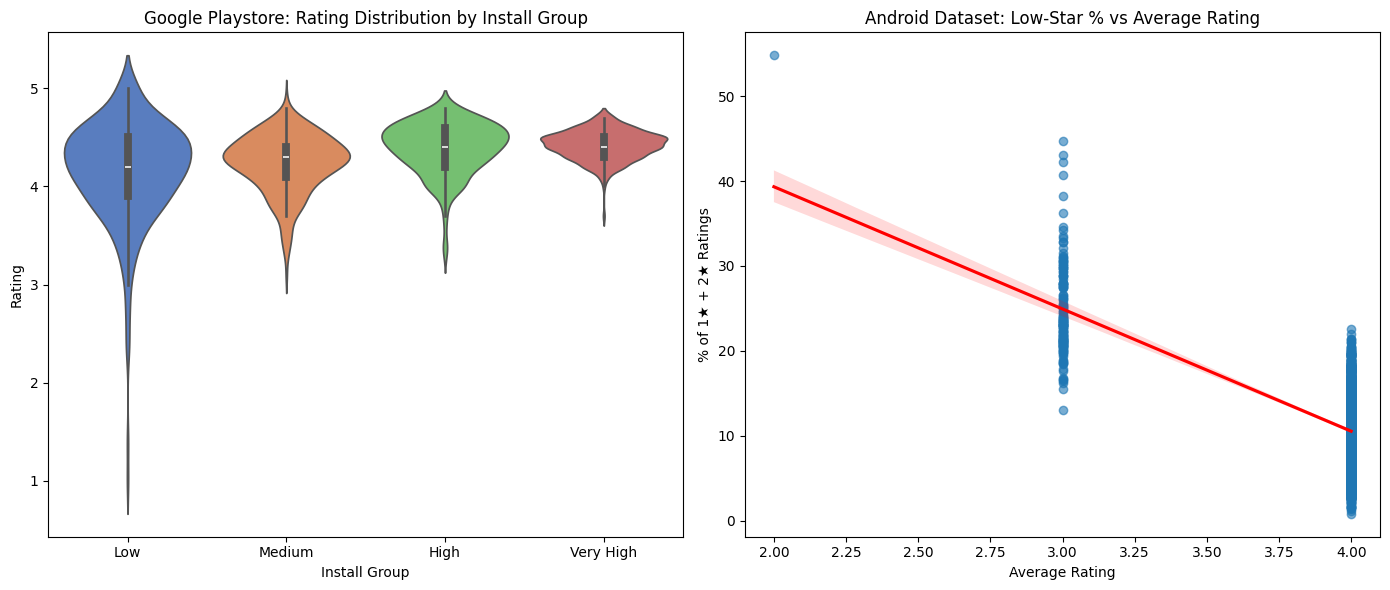

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# Load datasets
# =============================
google = pd.read_csv("googleplaystore_games.csv")
android = pd.read_csv("android-games.csv")

# =============================
# GOOGLE PLAYSTORE DATASET
# =============================
# Clean installs
google['Installs'] = google['Installs'].astype(str).str.replace('+','', regex=False).str.replace(',','', regex=False)
google['Installs'] = pd.to_numeric(google['Installs'], errors='coerce')

# Drop missing values
google_clean = google[['Installs','Rating']].dropna()

# Create install bins (quartiles)
google_clean['Install_Bins'] = pd.qcut(
    google_clean['Installs'],
    4,
    labels=["Low","Medium","High","Very High"]
)

# =============================
# ANDROID DATASET
# =============================
# Convert numeric safely
android['average rating'] = pd.to_numeric(android['average rating'], errors='coerce')
android['total ratings'] = pd.to_numeric(android['total ratings'], errors='coerce')
android['1 star ratings'] = pd.to_numeric(android['1 star ratings'], errors='coerce')
android['2 star ratings'] = pd.to_numeric(android['2 star ratings'], errors='coerce')

# Compute % of low-star ratings
android['low_star_pct'] = ((android['1 star ratings'] + android['2 star ratings']) / android['total ratings']) * 100

android_clean = android[['average rating','low_star_pct']].dropna()

# =============================
# PLOTS
# =============================
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Google Playstore: violin plot of ratings by install bins
sns.violinplot(
    data=google_clean,
    x='Install_Bins',
    y='Rating',
    hue='Install_Bins',       # required for palette
    palette="muted",
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Google Playstore: Rating Distribution by Install Group")
axes[0].set_xlabel("Install Group")
axes[0].set_ylabel("Rating")

# Android dataset: scatter with regression
sns.regplot(
    data=android_clean,
    x='average rating',
    y='low_star_pct',
    ax=axes[1],
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
axes[1].set_title("Android Dataset: Low-Star % vs Average Rating")
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("% of 1★ + 2★ Ratings")

plt.tight_layout()
plt.show()
